In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Lineardata_train (1).csv')

In [4]:
df.head()


,target,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,-5928.102746,-0.900470,0.850978,-2.069526,0.573887,-6.878165,1.533172,-6.163896,-18.134398,17.040815,...,-12.524825,3.376208,-19.266370,-24.347122,-21.504898,-83.231616,23.086856,-9.684523,18.211899,-16.848424
1,-738.890855,-0.266567,2.865496,-6.396780,1.517906,-0.339633,-2.173984,-7.100097,30.940664,-1.158169,...,5.686297,-6.862812,7.168795,-17.873042,-51.859538,9.262772,19.648597,6.529141,-4.577279,28.080530
2,-20186.841587,-0.058919,0.635366,-3.563216,1.848845,-4.255648,-6.495151,14.768858,20.968617,10.851276,...,16.819230,-8.112394,7.120777,4.301635,-36.838036,-408.786938,14.054136,-6.451438,-17.080408,-13.500953
3,30145.771674,-0.892483,-0.287881,-1.643086,0.630195,-2.989874,-6.706778,1.035763,42.115932,4.530884,...,-13.998268,-1.071906,40.051813,4.392608,-31.311818,534.588309,-20.380642,-1.092364,28.453693,14.643806
4,-3469.553888,-1.568419,1.535581,-4.562323,-1.953245,-3.505171,2.970568,11.589140,32.642438,-6.865592,...,10.057674,-3.719569,-52.342557,-13.150729,0.922421,-6.818339,-9.958228,12.798234,0.804627,1.271561


In [5]:
m,n=df.shape

In [6]:
X_train=np.array(df.loc[0:39999,"feature 1":"feature 20"])
X_train.shape

(40000, 20)

In [7]:
y_train=np.array(df.loc[0:39999,'target'])

In [8]:
y_train.shape

(40000,)

In [9]:
X_cv=np.array(df.loc[40000:,"feature 1":"feature 20"])

In [10]:
y_cv=np.array(df.loc[40000:,'target'])

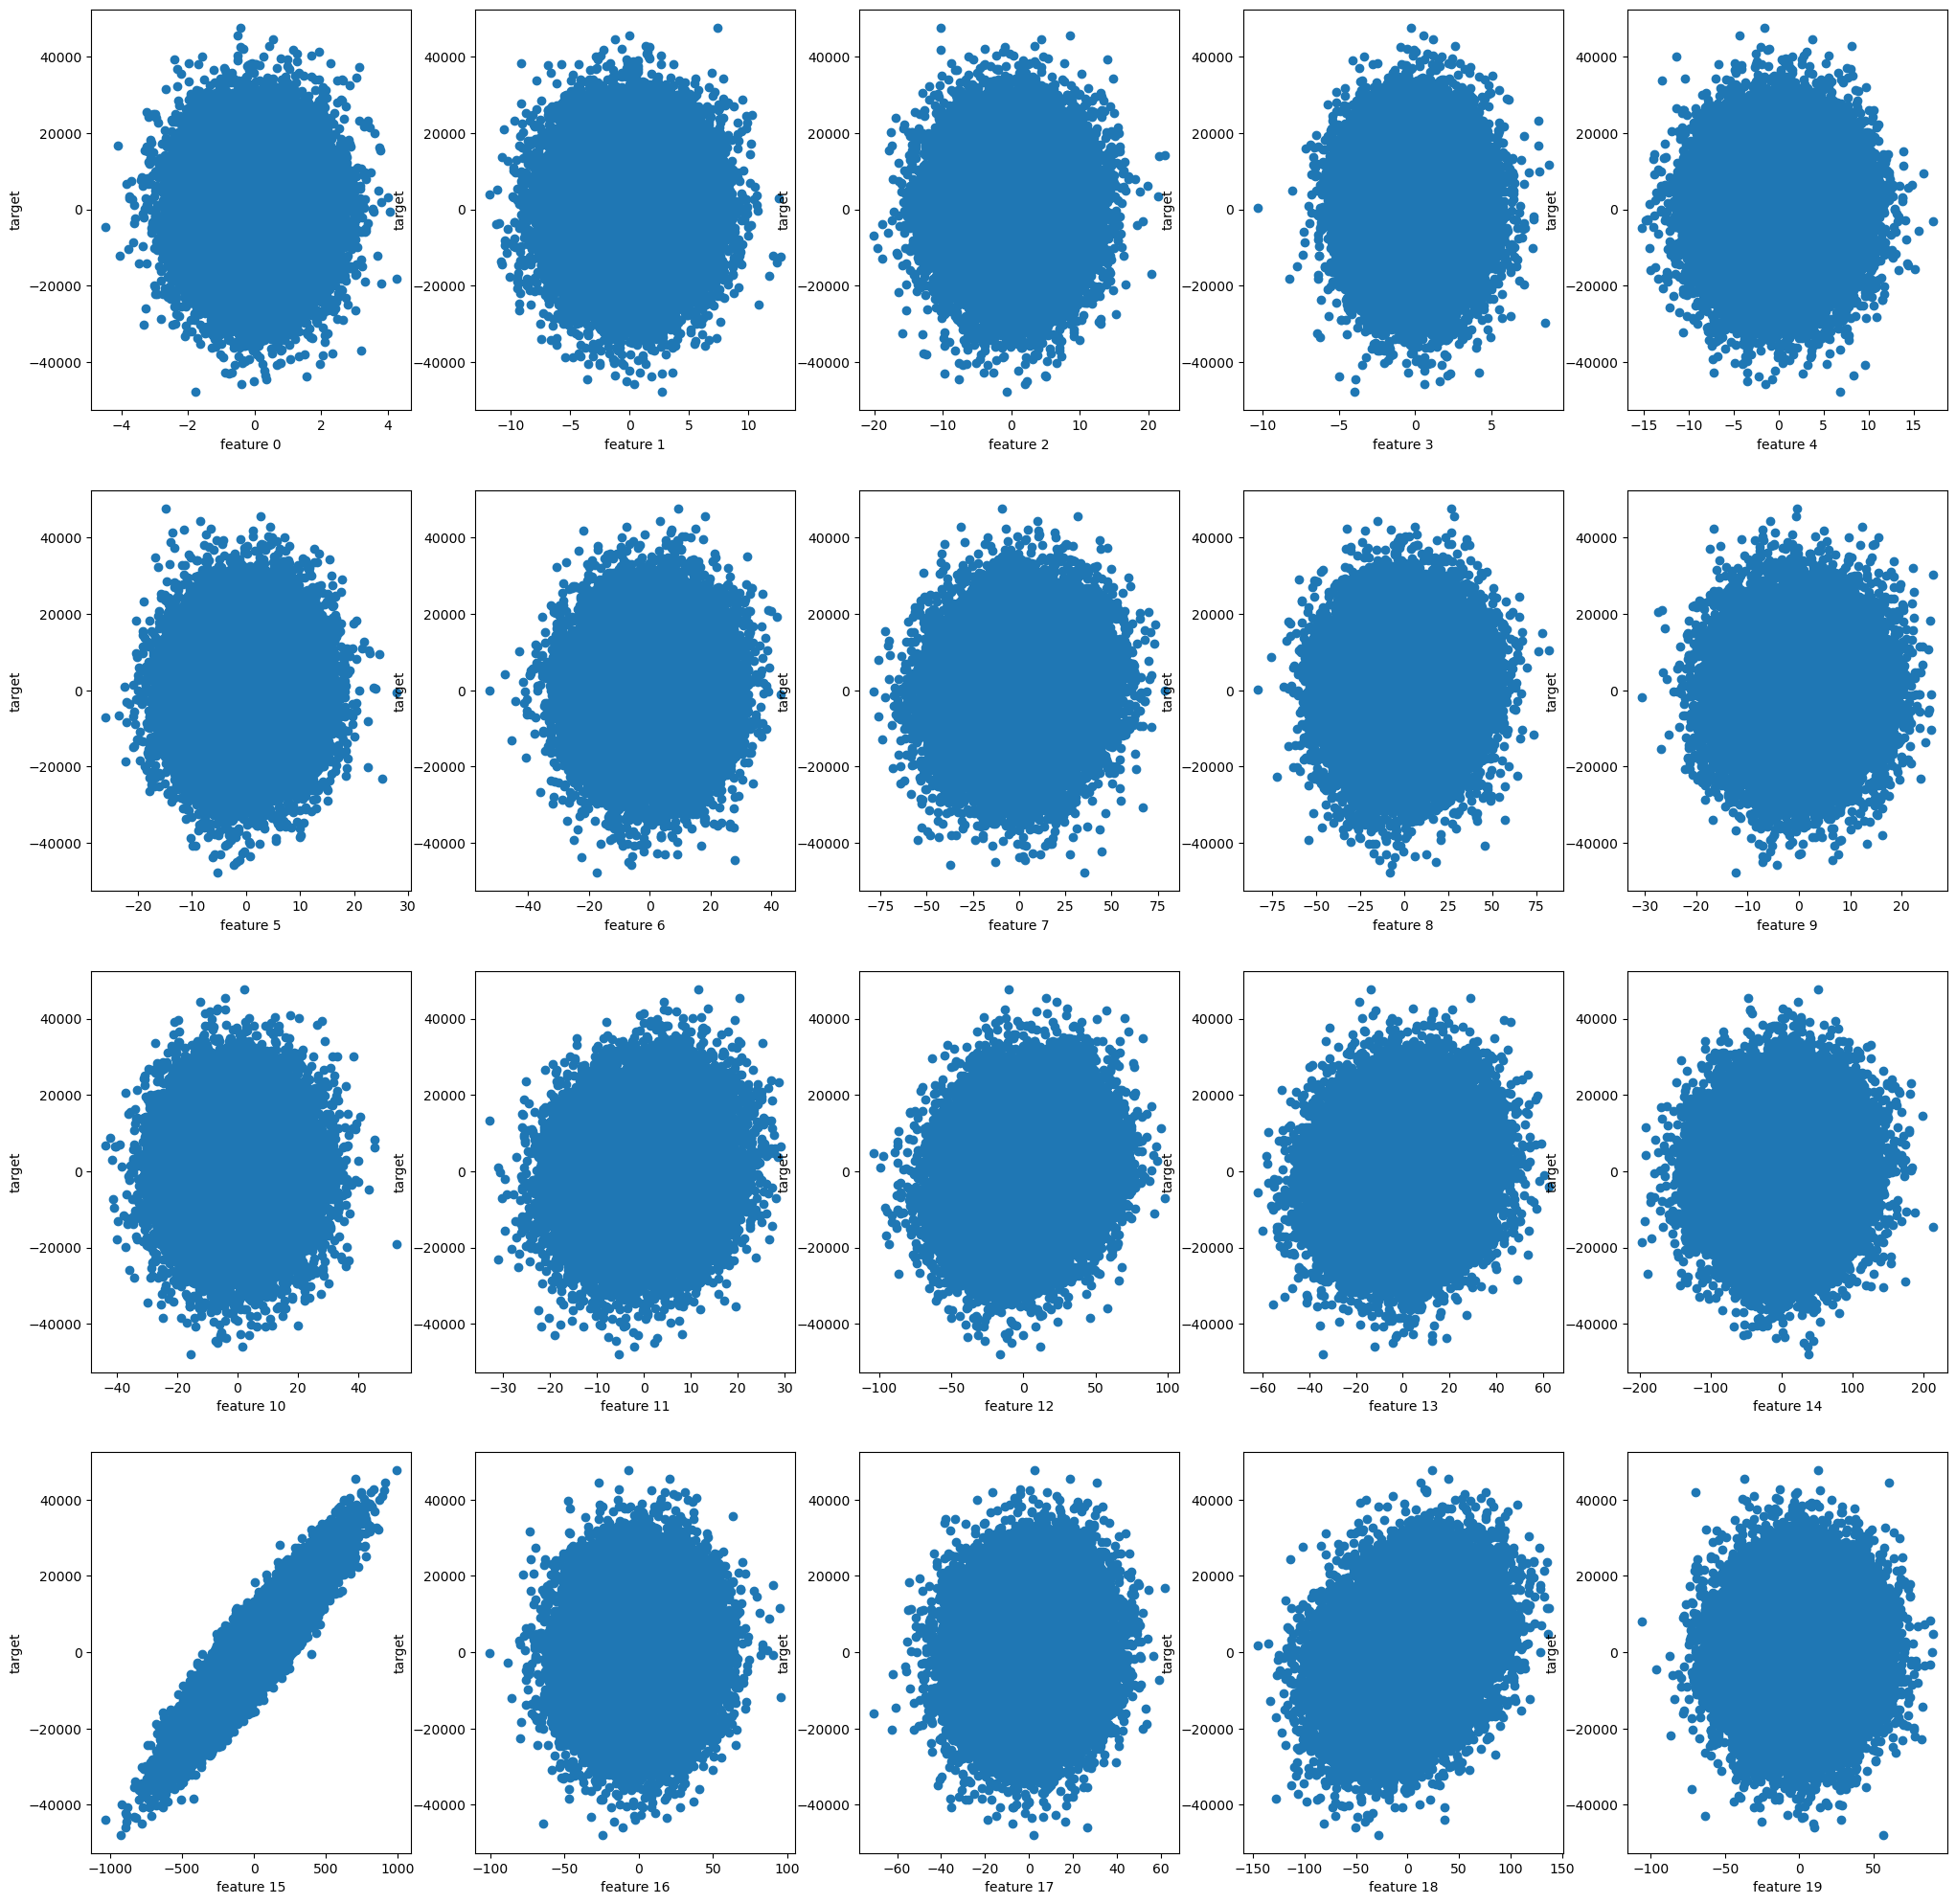

In [11]:
fig,axis=plt.subplots(nrows=4,ncols=5,figsize=(25,25))
for i in range(4):
    for j in range(5):
        axis[i,j].scatter(X_train[:,5*i+j],y_train)
        axis[i,j].set_xlabel('feature '+str(5*i+j))
        axis[i,j].set_ylabel('target')
        

In [12]:
def normalize(X):
    m,n=X.shape
    mean=np.mean(X,axis=0)
    dev=np.std(X,axis=0)
    return (X-mean)/dev,mean,dev

In [13]:
X_train,mean,dev=normalize(X_train)

In [14]:
def total_cost(X,y,W,b):
    t=X.shape[0]
    cost=np.sum((np.dot(X,W)+b-y)**2)/(2*t)
    return cost
def gradient(X,y,W,b):
    m,n=X.shape
    f_wb=np.dot(X,W)+b
    dj_dw=np.zeros(n,)
    dj_db=0.0
    dj_dw=np.dot(X.T,f_wb-y)/m
    dj_db=np.sum(f_wb-y)/m
    return dj_dw,dj_db

In [ ]:
lr=0.01
iters=5000
J_hist=[]
Weights=np.zeros(n-1,)
bias=0.0
for i in range(iters):
  dj_dw,dj_db=gradient(X_train,y_train,Weights,bias)
  Weights=Weights-lr*dj_dw
  bias=bias-lr*dj_db
  c=total_cost(X_train,y_train,Weights,bias)
  J_hist.append(c)

In [ ]:
for i in range(iters):
  if (i%1000==0):
    print(" cost at ", i, " = ", J_hist[i])

In [ ]:
print(Weights)

In [ ]:
print(bias)

In [ ]:
plt.plot(np.arange(len(J_hist)),J_hist)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.show()


In [ ]:
X_cv=(X_cv-mean)/dev

In [20]:
y_pred=np.dot(X_cv,Weights)+bias

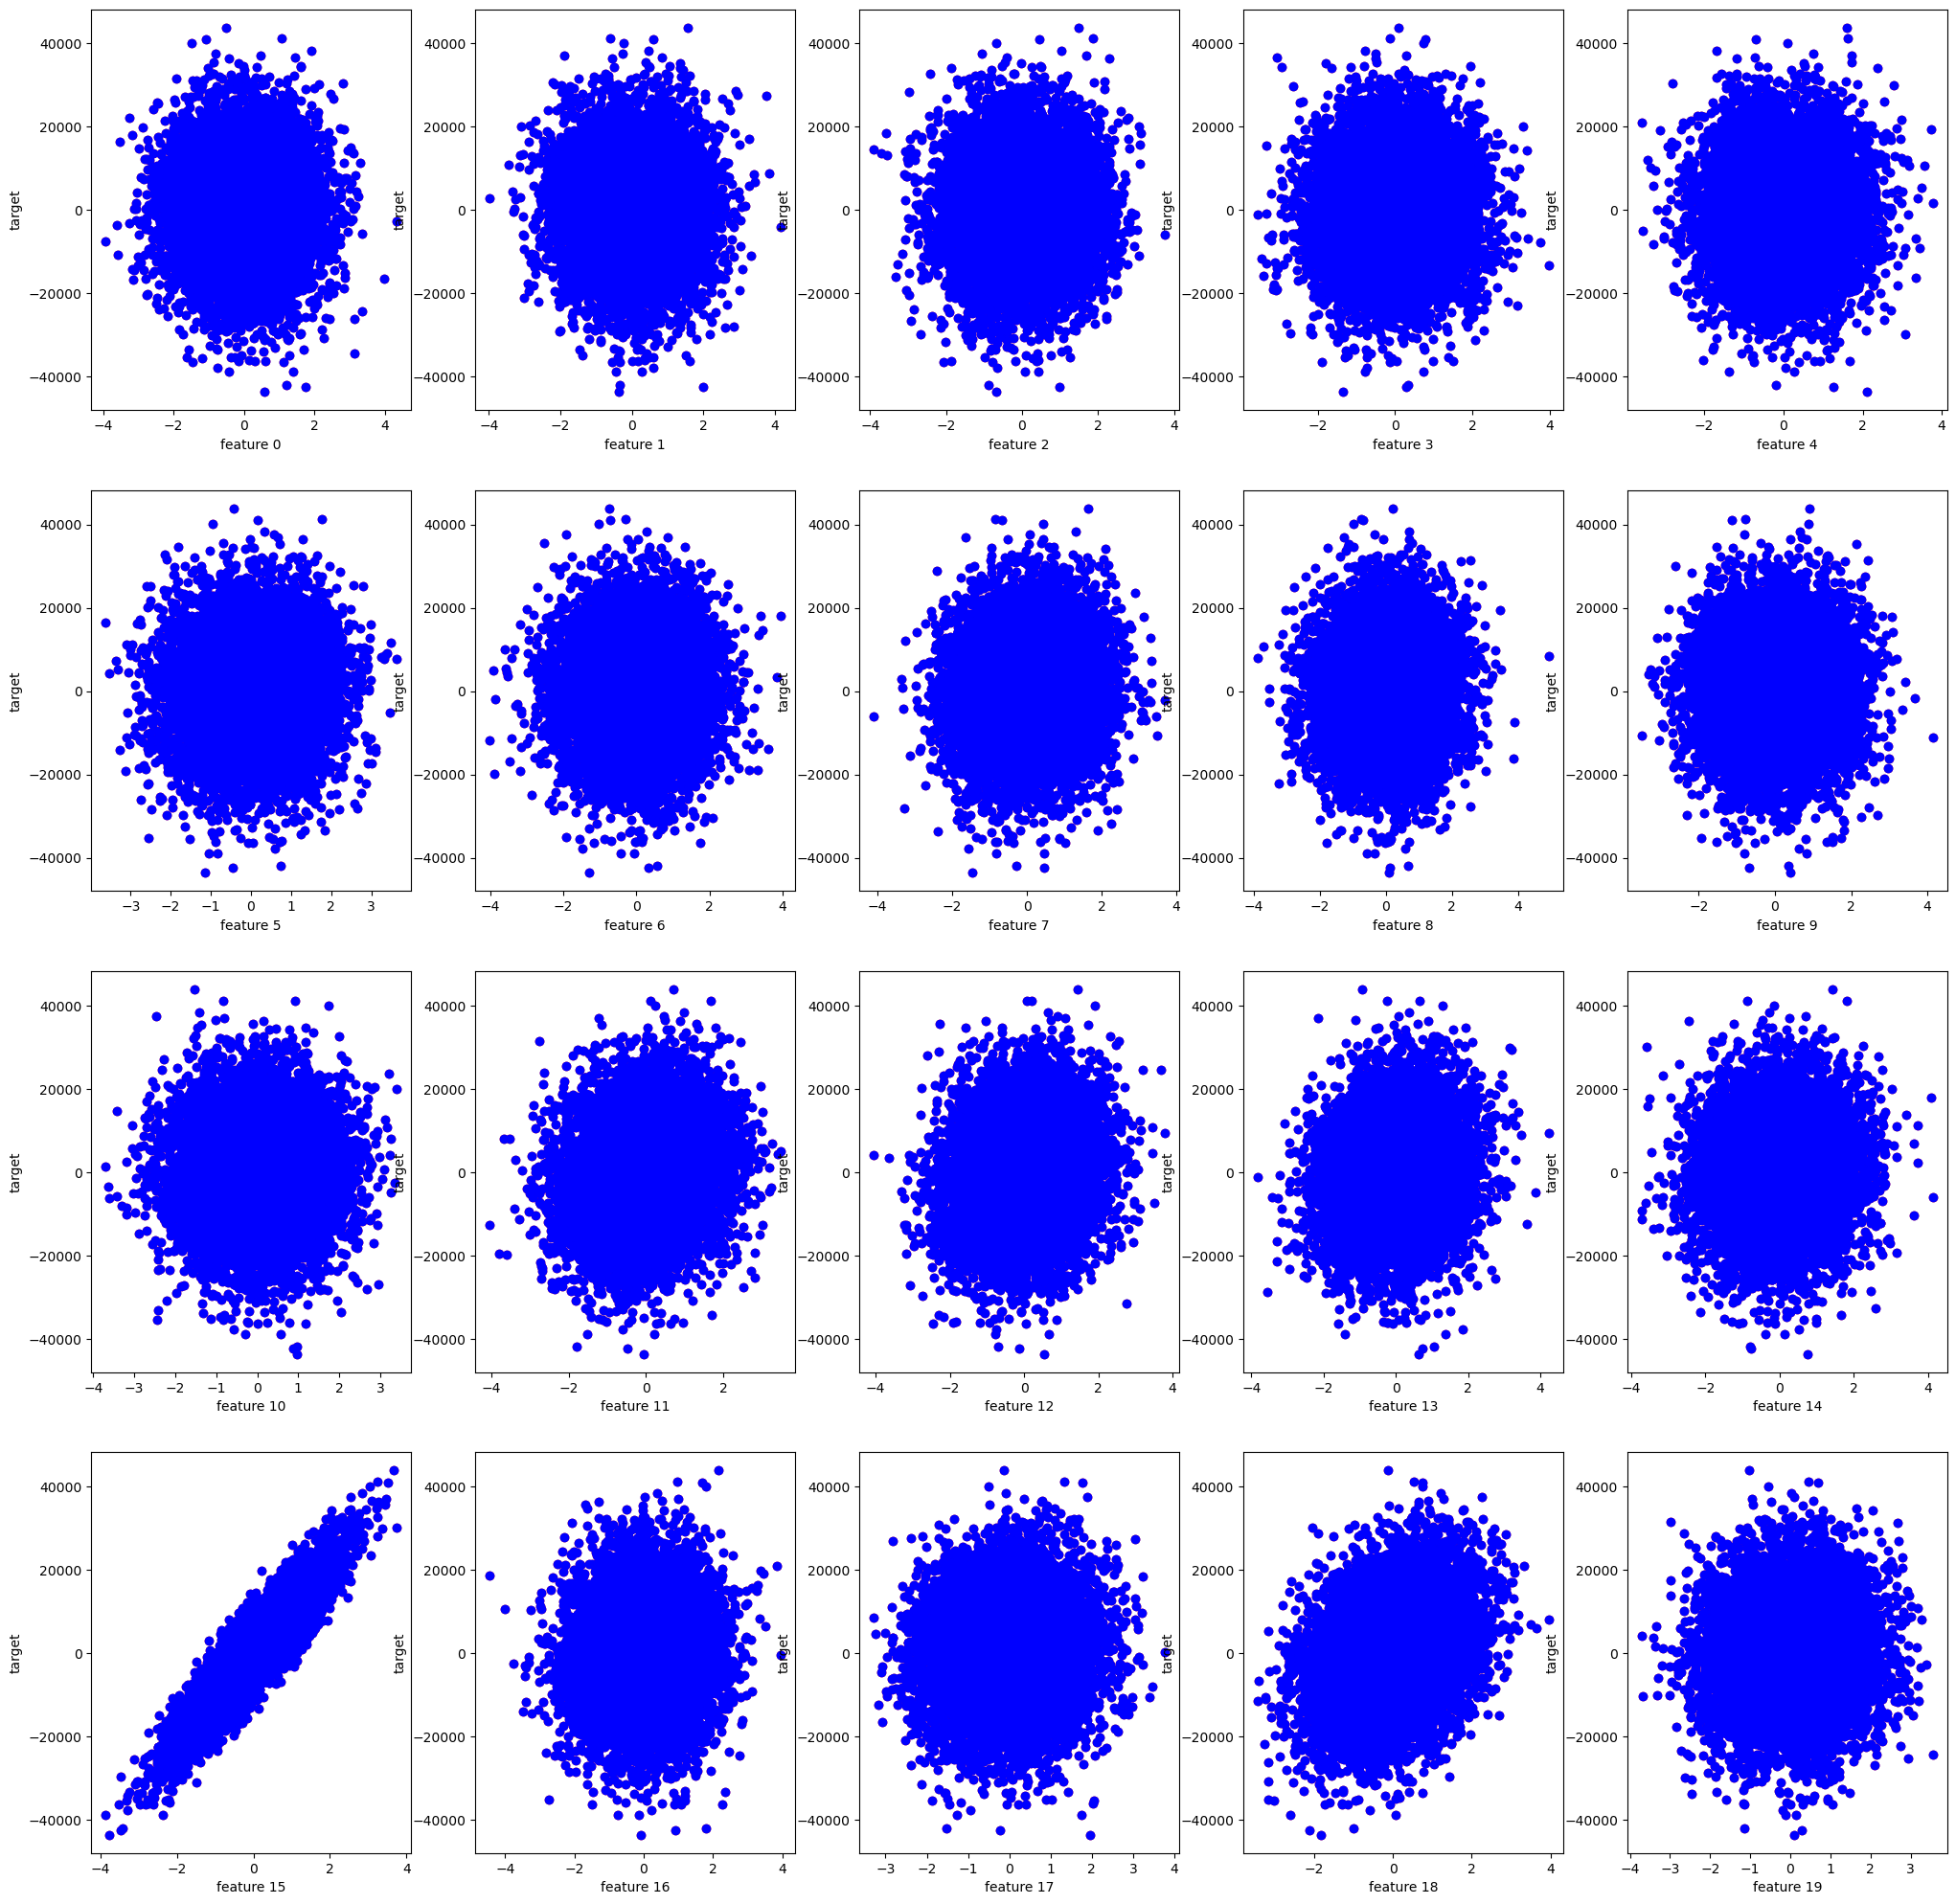

In [21]:
fig,axis=plt.subplots(nrows=4,ncols=5,figsize=(25,25))
for i in range(4):
    for j in range(5):
        axis[i,j].scatter(X_cv[:,5*i+j],y_cv,c='r')
        axis[i,j].scatter(X_cv[:,5*i+j],y_pred,c='b')
        axis[i,j].set_xlabel("feature "+str(5*i+j))
        axis[i,j].set_ylabel("target")

In [22]:
def r2_score(y,y_pred):
    return 1-np.sum(((y_pred-y)**2))/np.sum((y-np.mean(y))**2)
    

In [23]:
r2_score(y_cv,y_pred)

0.9999999999216167

In [24]:
y_pred_t=np.dot(X_train,Weights)+bias

In [25]:
r2_score(y_train,y_pred_t)

0.9999999999232193

In [26]:
df2=pd.read_csv('Lineardata_test (1).csv')

In [27]:
df2.head()

,ID,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,14189,0.634260,-0.771727,4.297694,-2.022710,0.487001,2.316767,11.626397,-10.657142,9.254734,...,-8.728623,7.035966,5.828558,8.596358,-16.510202,-132.396813,12.213839,21.383123,-37.841857,18.892385
1,14742,0.456128,3.154433,0.182006,-0.730634,-5.759530,1.448589,-10.292540,20.441249,9.943525,...,-4.899841,20.762134,-4.117988,-12.677107,-40.923007,367.557009,21.607952,-1.207279,-28.154185,-3.603744
2,13905,0.390815,-5.278284,1.625943,-1.775914,-2.461865,1.439888,6.213269,-17.212310,-17.308743,...,8.239316,6.588928,27.017658,-1.806317,-18.574372,-39.807081,-18.389553,7.466803,49.904659,46.990062
3,10072,1.067949,4.851061,3.909243,2.005500,2.880720,1.054944,-1.652801,-4.267849,3.860784,...,-4.580152,5.748974,6.949329,-2.369054,-6.953435,23.932892,-1.575264,-34.352606,16.941476,5.104177
4,14879,-0.589611,-3.533016,-1.705736,2.063013,-0.738696,2.475443,-4.982819,-19.693204,0.660739,...,2.222820,-11.731821,-8.069874,-5.881325,-26.060090,244.017215,-23.257490,9.819982,-34.672912,9.324556


In [28]:
df2.shape

(10000, 21)

In [33]:
X_test=np.array(df2.loc[:,'feature 1':'feature 20'])
X_test.shape

(10000, 20)

In [37]:
X_test_n=(X_test-mean)/dev

In [38]:
y_test=np.dot(X_test,Weights)+bias

In [39]:
print(y_test)

[-1473562.32170971  3808513.33072864  -235035.12076921 ...
  2576730.68082852 -4855838.0763729    683355.08399249]


In [40]:
df3=pd.DataFrame(y_test)

In [1]:
df3.to_csv("Label_output.csv")

NameError: name 'df3' is not defined